In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.enginnering import engin

In [2]:
train, test = Load_dataset()
drop_col = ['id', 'year', 'month', 'day', 'Country', 'City', 'lat', 'lon']
train_1 = train.drop(columns=drop_col)
corr = train_1.corr()

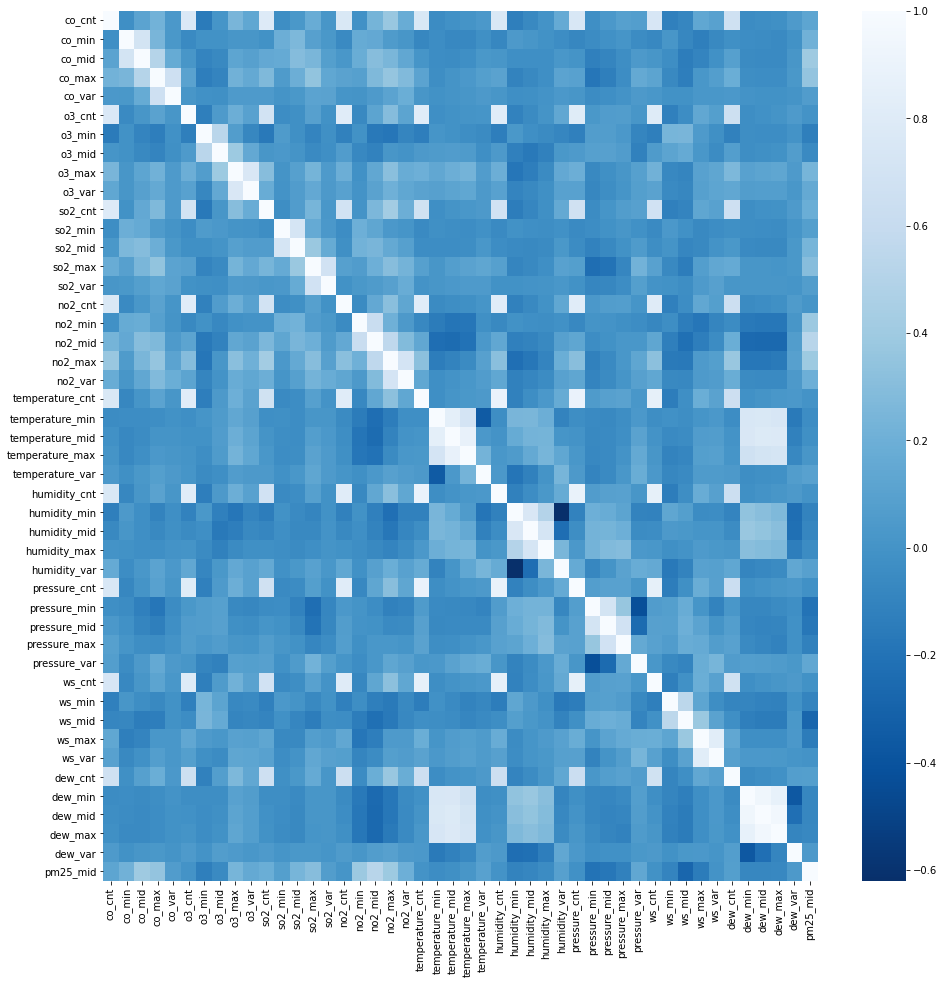

In [3]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap='Blues_r')
plt.savefig('Analyze/heatmap.png')

In [35]:
print(len(train['Country'].unique()))
print(len(test['Country'].unique()))

30
30


In [ ]:
for contry in test['Country'].unique():
    model = 
    predict
    df.append()

In [31]:
Australia = train[(train['Country']=='Australia')]
print(len(Australia["City"].unique()))
print(len(Australia))
Brisbane = Australia[(Australia['City']=='Brisbane')]
print(len(Brisbane))

6
5656
1009


In [29]:
Australia

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195773,195774,2021,12,31,Australia,Brisbane,-27.46794,153.02809,52,0.637,...,1.294,3.199,7.045,7.972,11,5.603,9.322,15.353,6.132,14.078
195774,195775,2021,12,31,Australia,Darwin,-12.46113,130.84185,70,2.506,...,2.029,4.667,6.961,5.915,71,22.218,25.157,27.320,6.026,20.144
195775,195776,2021,12,31,Australia,Melbourne,-37.81400,144.96332,53,0.086,...,1.318,2.776,7.246,8.547,11,1.830,2.987,6.887,5.990,37.554
195776,195777,2021,12,31,Australia,Newcastle,-32.92953,151.78010,133,4.380,...,0.495,4.279,8.688,15.309,250,0.267,1.211,10.571,12.802,64.990


In [6]:
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523
